In [1]:
import numpy as np

In this file, we will set up a pipeline for
1. Collecting data for an experiment
2. Processing the data
3. Running a machine learrning algorithm.
4. Evaluating the algorithm
5. Choosing the best algorithm and hyperparameters\

The main questions we need to answer are
1. How will data be collected?
2. How much data would we need?
3. What algorithm would be best? 
4. How would the amount of data influence algorithm selection?
5. How robust is our procedure to assumptions?

# Data collection

Here we want to call a simulator that collects data for us. The simulator can be arbitrary, but we would normally wish to have a specific API for calling it. In the simplest case, the only input parameter is the amount of data.

In [2]:
import data_generator

# Obtain data from the data generator. 
# In this case, the data generator gives us a random sample. Other sampling methodologies are possible, of course.
generator = data_generator.GaussianClassificationGenerator(2, np.array([0.3, 0.7]))

# Data processing

Here we perform preliminary processing of the data, if necessary. In particular, we may want to split the data in training, validation and test sets. Other standard pre-processing includes scaling the data, dealing with missing data, and removal of problematic data points. However, all of these could theoretically be dealt within the learning algorithm itself.

In [3]:
def process_data(X, Y):
    import sklearn.model_selection
    X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X,Y)
    return X_train, X_test, y_train, y_test


# Evaluation

Here we run an ML algorithm, using the data for finding appropriate parameters. It is best to have a unified interface for doing this as well. 

In [4]:
# get a Trained model
def Train(clf, X_train, y_train):
    clf.fit(X_train, y_train) # Common API for classifiers in sklearn
    return clf

In [5]:
from sklearn.metrics import accuracy_score
def Evaluate(clf, X_test, y_test):
    y_pred = clf.predict(X_test) # Common API
    accuracy = accuracy_score(y_pred, y_test)
    return accuracy

In [6]:
# The experiment setup

In [25]:
n_data = 20 # how much data would we have - this can vary to see how much data we need
n_experiments = 100 # More experiments give us higher faith in the result
n_evaluation_data = 10000 # this number should be relatively large to get good estimates

## Setup
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
models = [svm.SVC(gamma=0.01, C=100),
         LogisticRegression(random_state=0),
         MLPClassifier(random_state=1, max_iter=300)]
n_models = len(models)
score = np.zeros([n_models, n_experiments])
real_score = np.zeros([n_models, n_experiments])

[X_eval, y_eval] = generator.generate(n_evaluation_data) # data is generated here only to evaluate the pipeline

# The point of the experiment is to evaluate the models and select the best
for i in range(n_experiments):
    print ("Experiment ", i);
    print ("------------");
    [X, Y] = generator.generate(n_data) # data is generated here
    [X_train, X_test, y_train, y_test] = process_data(X, Y) # processing also splits the data in two parts
    k = 0
   
    for model in models:
        Train(model, X_train, y_train)
        score[k,i] = Evaluate(model, X_test, y_test)
        real_score[k,i] = Evaluate(model, X_eval, y_eval)
        print(model, score[k,i], real_score[k,i])
        k+=1
        

Experiment  0
------------
SVC(C=100, gamma=0.01) 0.0 0.4844
LogisticRegression(random_state=0) 0.0 0.5149
MLPClassifier(max_iter=300, random_state=1) 0.0 0.5097
Experiment  1
------------
SVC(C=100, gamma=0.01) 0.6 0.711
LogisticRegression(random_state=0) 0.6 0.7219


/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.6 0.7324
Experiment  2
------------
SVC(C=100, gamma=0.01) 0.6 0.6988
LogisticRegression(random_state=0) 0.6 0.7114
MLPClassifier(max_iter=300, random_state=1) 0.6 0.7257
Experiment  3
------------
SVC(C=100, gamma=0.01) 0.4 0.6999
LogisticRegression(random_state=0) 0.2 0.6767


/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.2 0.6025
Experiment  4
------------
SVC(C=100, gamma=0.01) 0.6 0.678
LogisticRegression(random_state=0) 0.4 0.6982
MLPClassifier(max_iter=300, random_state=1) 0.6 0.7066
Experiment  5
------------
SVC(C=100, gamma=0.01) 0.6 0.7141
LogisticRegression(random_state=0) 0.6 0.7164


/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.6 0.7189
Experiment  6
------------
SVC(C=100, gamma=0.01) 0.6 0.7306
LogisticRegression(random_state=0) 0.6 0.7255
MLPClassifier(max_iter=300, random_state=1) 0.6 0.7218
Experiment  7
------------
SVC(C=100, gamma=0.01) 0.6 0.6174
LogisticRegression(random_state=0) 0.6 0.6663


/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.4 0.6442
Experiment  8
------------
SVC(C=100, gamma=0.01) 1.0 0.7296
LogisticRegression(random_state=0) 1.0 0.7076
MLPClassifier(max_iter=300, random_state=1) 0.8 0.7105
Experiment  9
------------
SVC(C=100, gamma=0.01) 0.6 0.6853
LogisticRegression(random_state=0) 0.6 0.6103


/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.2 0.6335
Experiment  10
------------
SVC(C=100, gamma=0.01) 0.6 0.7066
LogisticRegression(random_state=0) 0.6 0.651
MLPClassifier(max_iter=300, random_state=1) 0.4 0.6669
Experiment  11
------------
SVC(C=100, gamma=0.01) 0.8 0.661
LogisticRegression(random_state=0) 0.8 0.6907


/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.8 0.6985
Experiment  12
------------
SVC(C=100, gamma=0.01) 0.8 0.7
LogisticRegression(random_state=0) 0.6 0.6938
MLPClassifier(max_iter=300, random_state=1) 0.8 0.6792
Experiment  13
------------
SVC(C=100, gamma=0.01) 0.6 0.6999
LogisticRegression(random_state=0) 0.6 0.6969


/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.8 0.6287
Experiment  14
------------
SVC(C=100, gamma=0.01) 0.8 0.731
LogisticRegression(random_state=0) 0.6 0.6413
MLPClassifier(max_iter=300, random_state=1) 0.6 0.6498
Experiment  15
------------
SVC(C=100, gamma=0.01) 0.4 0.7238
LogisticRegression(random_state=0) 0.4 0.6852


/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.6 0.7215
Experiment  16
------------
SVC(C=100, gamma=0.01) 0.8 0.722
LogisticRegression(random_state=0) 0.8 0.7176
MLPClassifier(max_iter=300, random_state=1) 0.8 0.6948
Experiment  17
------------
SVC(C=100, gamma=0.01) 1.0 0.6987
LogisticRegression(random_state=0) 0.8 0.7143


/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 1.0 0.7099
Experiment  18
------------
SVC(C=100, gamma=0.01) 0.8 0.6999
LogisticRegression(random_state=0) 0.8 0.7185
MLPClassifier(max_iter=300, random_state=1) 0.8 0.7225
Experiment  19
------------
SVC(C=100, gamma=0.01) 0.8 0.7305
LogisticRegression(random_state=0) 0.4 0.7113


/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.8 0.7104
Experiment  20
------------
SVC(C=100, gamma=0.01) 0.6 0.3334
LogisticRegression(random_state=0) 0.6 0.3805
MLPClassifier(max_iter=300, random_state=1) 0.4 0.6476
Experiment  21
------------
SVC(C=100, gamma=0.01) 0.6 0.5776
LogisticRegression(random_state=0) 0.4 0.5512


/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.6 0.6041
Experiment  22
------------
SVC(C=100, gamma=0.01) 0.6 0.6316
LogisticRegression(random_state=0) 0.8 0.5954
MLPClassifier(max_iter=300, random_state=1) 0.6 0.6096
Experiment  23
------------
SVC(C=100, gamma=0.01) 0.8 0.7252
LogisticRegression(random_state=0) 0.8 0.7076


/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.8 0.7196
Experiment  24
------------
SVC(C=100, gamma=0.01) 0.8 0.7436
LogisticRegression(random_state=0) 0.8 0.6618
MLPClassifier(max_iter=300, random_state=1) 1.0 0.6912
Experiment  25
------------
SVC(C=100, gamma=0.01) 0.8 0.7323
LogisticRegression(random_state=0) 0.8 0.6915


/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.8 0.75
Experiment  26
------------
SVC(C=100, gamma=0.01) 0.8 0.7121
LogisticRegression(random_state=0) 0.8 0.6997
MLPClassifier(max_iter=300, random_state=1) 0.6 0.6444
Experiment  27
------------
SVC(C=100, gamma=0.01) 0.4 0.7311
LogisticRegression(random_state=0) 0.4 0.7164


/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.4 0.7094
Experiment  28
------------
SVC(C=100, gamma=0.01) 0.8 0.6942
LogisticRegression(random_state=0) 0.8 0.6446
MLPClassifier(max_iter=300, random_state=1) 0.8 0.6824
Experiment  29
------------
SVC(C=100, gamma=0.01) 0.4 0.7109
LogisticRegression(random_state=0) 0.4 0.6869


/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.2 0.7338
Experiment  30
------------
SVC(C=100, gamma=0.01) 0.6 0.6165
LogisticRegression(random_state=0) 0.6 0.6039
MLPClassifier(max_iter=300, random_state=1) 0.6 0.6261
Experiment  31
------------
SVC(C=100, gamma=0.01) 0.8 0.7279
LogisticRegression(random_state=0) 1.0 0.7204


/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.6 0.7166
Experiment  32
------------
SVC(C=100, gamma=0.01) 0.4 0.7329
LogisticRegression(random_state=0) 0.6 0.7003
MLPClassifier(max_iter=300, random_state=1) 0.4 0.7195
Experiment  33
------------
SVC(C=100, gamma=0.01) 0.6 0.6791
LogisticRegression(random_state=0) 0.8 0.6796


/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.8 0.6845
Experiment  34
------------
SVC(C=100, gamma=0.01) 0.4 0.6999
LogisticRegression(random_state=0) 0.4 0.7094
MLPClassifier(max_iter=300, random_state=1) 0.4 0.6957
Experiment  35
------------
SVC(C=100, gamma=0.01) 1.0 0.713
LogisticRegression(random_state=0) 1.0 0.7125


/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 1.0 0.6896
Experiment  36
------------
SVC(C=100, gamma=0.01) 1.0 0.718
LogisticRegression(random_state=0) 1.0 0.7005
MLPClassifier(max_iter=300, random_state=1) 1.0 0.7316
Experiment  37
------------
SVC(C=100, gamma=0.01) 0.2 0.6225
LogisticRegression(random_state=0) 0.6 0.6966


/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.2 0.6264
Experiment  38
------------
SVC(C=100, gamma=0.01) 1.0 0.5285
LogisticRegression(random_state=0) 1.0 0.5316
MLPClassifier(max_iter=300, random_state=1) 0.8 0.4926
Experiment  39
------------
SVC(C=100, gamma=0.01) 1.0 0.7155
LogisticRegression(random_state=0) 0.8 0.7059


/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 1.0 0.7153
Experiment  40
------------
SVC(C=100, gamma=0.01) 0.2 0.6509
LogisticRegression(random_state=0) 0.6 0.6847
MLPClassifier(max_iter=300, random_state=1) 0.2 0.618
Experiment  41
------------
SVC(C=100, gamma=0.01) 0.6 0.6999
LogisticRegression(random_state=0) 0.6 0.7042


/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.6 0.6999
Experiment  42
------------
SVC(C=100, gamma=0.01) 1.0 0.7031
LogisticRegression(random_state=0) 1.0 0.7165
MLPClassifier(max_iter=300, random_state=1) 0.8 0.7322
Experiment  43
------------
SVC(C=100, gamma=0.01) 0.2 0.6549
LogisticRegression(random_state=0) 0.2 0.6344


/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.4 0.6
Experiment  44
------------
SVC(C=100, gamma=0.01) 0.8 0.7072
LogisticRegression(random_state=0) 0.6 0.6227
MLPClassifier(max_iter=300, random_state=1) 0.8 0.7389
Experiment  45
------------
SVC(C=100, gamma=0.01) 0.4 0.716
LogisticRegression(random_state=0) 0.6 0.6895


/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.4 0.6967
Experiment  46
------------
SVC(C=100, gamma=0.01) 0.4 0.7169
LogisticRegression(random_state=0) 0.2 0.7149
MLPClassifier(max_iter=300, random_state=1) 0.4 0.6965
Experiment  47
------------
SVC(C=100, gamma=0.01) 0.4 0.7328
LogisticRegression(random_state=0) 0.4 0.6964


/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 1.0 0.6559
Experiment  48
------------
SVC(C=100, gamma=0.01) 0.8 0.6528
LogisticRegression(random_state=0) 0.8 0.6198
MLPClassifier(max_iter=300, random_state=1) 1.0 0.6718
Experiment  49
------------
SVC(C=100, gamma=0.01) 0.8 0.6999
LogisticRegression(random_state=0) 0.8 0.7065


/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.8 0.6999
Experiment  50
------------
SVC(C=100, gamma=0.01) 0.6 0.4319
LogisticRegression(random_state=0) 0.6 0.5812
MLPClassifier(max_iter=300, random_state=1) 0.8 0.5731
Experiment  51
------------
SVC(C=100, gamma=0.01) 1.0 0.6999
LogisticRegression(random_state=0) 1.0 0.7078


/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 1.0 0.6806
Experiment  52
------------
SVC(C=100, gamma=0.01) 0.6 0.7226
LogisticRegression(random_state=0) 0.6 0.7009
MLPClassifier(max_iter=300, random_state=1) 0.8 0.7062
Experiment  53
------------
SVC(C=100, gamma=0.01) 0.8 0.7002
LogisticRegression(random_state=0) 0.6 0.6759


/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.4 0.5994
Experiment  54
------------
SVC(C=100, gamma=0.01) 0.6 0.7347
LogisticRegression(random_state=0) 0.6 0.7019
MLPClassifier(max_iter=300, random_state=1) 0.4 0.6397
Experiment  55
------------
SVC(C=100, gamma=0.01) 0.8 0.6251
LogisticRegression(random_state=0) 1.0 0.5988


/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.6 0.6767
Experiment  56
------------
SVC(C=100, gamma=0.01) 0.8 0.7106
LogisticRegression(random_state=0) 0.6 0.713
MLPClassifier(max_iter=300, random_state=1) 0.8 0.7313
Experiment  57
------------
SVC(C=100, gamma=0.01) 0.6 0.7357
LogisticRegression(random_state=0) 0.4 0.6999


/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.6 0.6917
Experiment  58
------------
SVC(C=100, gamma=0.01) 0.6 0.7283
LogisticRegression(random_state=0) 0.6 0.7148
MLPClassifier(max_iter=300, random_state=1) 0.6 0.7203
Experiment  59
------------
SVC(C=100, gamma=0.01) 0.6 0.6999
LogisticRegression(random_state=0) 0.6 0.6999


/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.6 0.6999
Experiment  60
------------
SVC(C=100, gamma=0.01) 0.6 0.6711
LogisticRegression(random_state=0) 0.6 0.6052
MLPClassifier(max_iter=300, random_state=1) 0.6 0.6773
Experiment  61
------------
SVC(C=100, gamma=0.01) 0.4 0.7255
LogisticRegression(random_state=0) 0.4 0.7132


/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.4 0.7015
Experiment  62
------------
SVC(C=100, gamma=0.01) 0.8 0.7331
LogisticRegression(random_state=0) 0.8 0.69
MLPClassifier(max_iter=300, random_state=1) 0.8 0.6442
Experiment  63
------------
SVC(C=100, gamma=0.01) 0.8 0.6999
LogisticRegression(random_state=0) 0.8 0.7038


/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.8 0.7143
Experiment  64
------------
SVC(C=100, gamma=0.01) 0.6 0.7018
LogisticRegression(random_state=0) 0.4 0.6993
MLPClassifier(max_iter=300, random_state=1) 0.6 0.6623
Experiment  65
------------
SVC(C=100, gamma=0.01) 0.8 0.6272
LogisticRegression(random_state=0) 1.0 0.6369


/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.8 0.625
Experiment  66
------------
SVC(C=100, gamma=0.01) 0.6 0.6466
LogisticRegression(random_state=0) 0.4 0.6064
MLPClassifier(max_iter=300, random_state=1) 0.6 0.6276
Experiment  67
------------
SVC(C=100, gamma=0.01) 0.4 0.7392
LogisticRegression(random_state=0) 0.6 0.7048


/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.0 0.7272
Experiment  68
------------
SVC(C=100, gamma=0.01) 1.0 0.7239
LogisticRegression(random_state=0) 1.0 0.6999
MLPClassifier(max_iter=300, random_state=1) 0.4 0.6969
Experiment  69
------------
SVC(C=100, gamma=0.01) 0.6 0.6999
LogisticRegression(random_state=0) 0.6 0.6995


/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.6 0.6863
Experiment  70
------------
SVC(C=100, gamma=0.01) 1.0 0.7242
LogisticRegression(random_state=0) 1.0 0.698
MLPClassifier(max_iter=300, random_state=1) 0.8 0.6907
Experiment  71
------------
SVC(C=100, gamma=0.01) 0.8 0.7208
LogisticRegression(random_state=0) 0.8 0.7198


/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.8 0.7219
Experiment  72
------------
SVC(C=100, gamma=0.01) 0.6 0.7185
LogisticRegression(random_state=0) 0.8 0.7206
MLPClassifier(max_iter=300, random_state=1) 0.4 0.716
Experiment  73
------------
SVC(C=100, gamma=0.01) 1.0 0.7147
LogisticRegression(random_state=0) 1.0 0.6585


/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.8 0.7118
Experiment  74
------------
SVC(C=100, gamma=0.01) 0.4 0.5338
LogisticRegression(random_state=0) 0.4 0.5323
MLPClassifier(max_iter=300, random_state=1) 0.4 0.5652
Experiment  75
------------
SVC(C=100, gamma=0.01) 0.8 0.7212
LogisticRegression(random_state=0) 0.8 0.693


/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.8 0.6984
Experiment  76
------------
SVC(C=100, gamma=0.01) 0.4 0.7019
LogisticRegression(random_state=0) 0.2 0.7199
MLPClassifier(max_iter=300, random_state=1) 0.2 0.7274
Experiment  77
------------
SVC(C=100, gamma=0.01) 0.8 0.6172
LogisticRegression(random_state=0) 0.8 0.6048


/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.8 0.5918
Experiment  78
------------
SVC(C=100, gamma=0.01) 0.6 0.7187
LogisticRegression(random_state=0) 0.6 0.7163
MLPClassifier(max_iter=300, random_state=1) 0.6 0.6936
Experiment  79
------------
SVC(C=100, gamma=0.01) 0.8 0.7223
LogisticRegression(random_state=0) 0.8 0.7196


/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.8 0.754
Experiment  80
------------
SVC(C=100, gamma=0.01) 0.8 0.6706
LogisticRegression(random_state=0) 0.8 0.6911
MLPClassifier(max_iter=300, random_state=1) 1.0 0.709
Experiment  81
------------
SVC(C=100, gamma=0.01) 0.8 0.6999
LogisticRegression(random_state=0) 0.8 0.7


/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.8 0.6991
Experiment  82
------------
SVC(C=100, gamma=0.01) 0.8 0.7318
LogisticRegression(random_state=0) 0.8 0.7147
MLPClassifier(max_iter=300, random_state=1) 0.6 0.703
Experiment  83
------------
SVC(C=100, gamma=0.01) 0.6 0.6999
LogisticRegression(random_state=0) 0.6 0.6999


/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.6 0.7516
Experiment  84
------------
SVC(C=100, gamma=0.01) 0.8 0.6141
LogisticRegression(random_state=0) 1.0 0.7011
MLPClassifier(max_iter=300, random_state=1) 0.8 0.66
Experiment  85
------------
SVC(C=100, gamma=0.01) 0.8 0.7248
LogisticRegression(random_state=0) 0.8 0.6925


/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.8 0.7358
Experiment  86
------------
SVC(C=100, gamma=0.01) 0.6 0.7167
LogisticRegression(random_state=0) 0.6 0.7211
MLPClassifier(max_iter=300, random_state=1) 0.6 0.7137
Experiment  87
------------
SVC(C=100, gamma=0.01) 0.6 0.6999
LogisticRegression(random_state=0) 0.6 0.7034


/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.6 0.6999
Experiment  88
------------
SVC(C=100, gamma=0.01) 0.6 0.7241
LogisticRegression(random_state=0) 0.6 0.7258
MLPClassifier(max_iter=300, random_state=1) 0.4 0.7162
Experiment  89
------------
SVC(C=100, gamma=0.01) 1.0 0.7116
LogisticRegression(random_state=0) 1.0 0.6599


/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.6 0.643
Experiment  90
------------
SVC(C=100, gamma=0.01) 0.6 0.7015
LogisticRegression(random_state=0) 0.6 0.7158
MLPClassifier(max_iter=300, random_state=1) 0.6 0.7187
Experiment  91
------------
SVC(C=100, gamma=0.01) 0.8 0.7114
LogisticRegression(random_state=0) 0.6 0.6813


/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.4 0.6689
Experiment  92
------------
SVC(C=100, gamma=0.01) 0.6 0.6142
LogisticRegression(random_state=0) 0.4 0.6779
MLPClassifier(max_iter=300, random_state=1) 0.8 0.5782
Experiment  93
------------
SVC(C=100, gamma=0.01) 0.8 0.6317
LogisticRegression(random_state=0) 0.8 0.6299


/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.6 0.6234
Experiment  94
------------
SVC(C=100, gamma=0.01) 0.6 0.6398
LogisticRegression(random_state=0) 0.6 0.6172
MLPClassifier(max_iter=300, random_state=1) 0.4 0.5882
Experiment  95
------------
SVC(C=100, gamma=0.01) 1.0 0.7099
LogisticRegression(random_state=0) 1.0 0.7228


/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 1.0 0.7058
Experiment  96
------------
SVC(C=100, gamma=0.01) 0.0 0.6356
LogisticRegression(random_state=0) 0.2 0.6665
MLPClassifier(max_iter=300, random_state=1) 0.2 0.6639
Experiment  97
------------
SVC(C=100, gamma=0.01) 0.8 0.7176
LogisticRegression(random_state=0) 0.8 0.7071


/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 1.0 0.7069
Experiment  98
------------
SVC(C=100, gamma=0.01) 0.6 0.7365
LogisticRegression(random_state=0) 0.4 0.7207
MLPClassifier(max_iter=300, random_state=1) 0.8 0.7373
Experiment  99
------------
SVC(C=100, gamma=0.01) 0.2 0.5104
LogisticRegression(random_state=0) 0.2 0.5353
MLPClassifier(max_iter=300, random_state=1) 0.4 0.5877


/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [26]:
print("Average scores", np.mean(score,axis=1))
print("Actual scores", np.mean(real_score,axis=1))

# Here we can see what would happen if we selected methods according to their test score
selected_method = np.argmax(score, axis=0)
selected_score = [score[selected_method[t], t] for t in range(n_experiments)]
selected_real_score = [real_score[selected_method[t], t] for t in range(n_experiments)]
                  
print("Test scores of selected", np.mean(selected_score))
print("Actual score of selected", np.mean(selected_real_score))
      

Average scores [0.664 0.654 0.63 ]
Actual scores [0.683551 0.675756 0.678504]
Test scores of selected 0.7240000000000001
Actual score of selected 0.683856


# Actual Selected versus Measured Score

As we can see, the average score of every single method on the test set is lower than the average score of the selected method. This is because we selected methods that were by chance the best on a random  training set. 
For the same reason, the test score that we measure is (on average) higher than the actual score.


In [27]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Test score distribution')

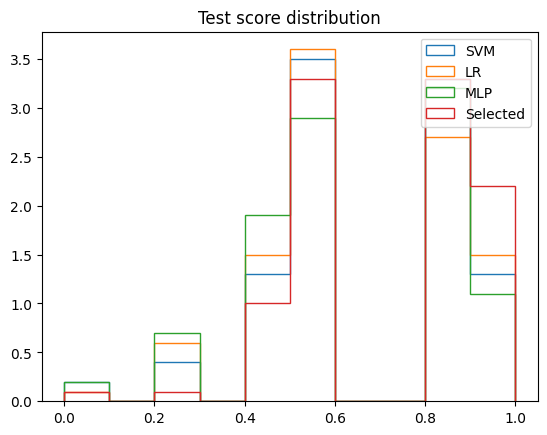

In [28]:
plt.hist(score[0], histtype="step", density=True)
plt.hist(score[1], histtype="step", density=True)
plt.hist(score[2], histtype="step", density=True)
plt.hist(selected_score, histtype="step", density=True)

plt.legend(["SVM", "LR", "MLP", "Selected"])
plt.title("Test score distribution")


Text(0.5, 1.0, 'Actual score distribution')

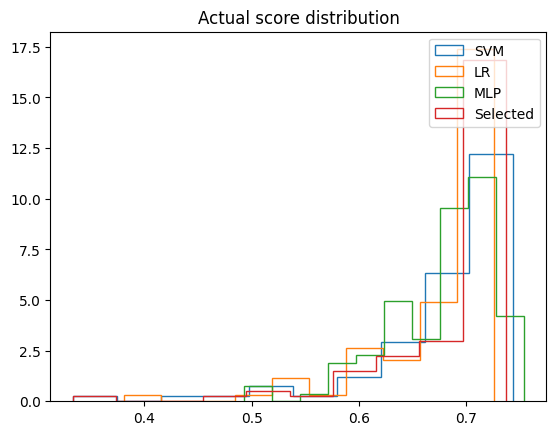

In [29]:
plt.hist(real_score[0], histtype="step", density=True)
plt.hist(real_score[1], histtype="step", density=True)
plt.hist(real_score[2], histtype="step", density=True)
plt.hist(selected_real_score, histtype="step", density=True)
plt.legend(["SVM", "LR", "MLP", "Selected"])

plt.title("Actual score distribution")


In [30]:
score[selected_method,:]

array([[0. , 0.6, 0.6, ..., 0.8, 0.6, 0.2],
       [0. , 0.6, 0.6, ..., 0.8, 0.6, 0.2],
       [0. , 0.6, 0.6, ..., 0.8, 0.6, 0.2],
       ...,
       [0. , 0.6, 0.6, ..., 1. , 0.8, 0.4],
       [0. , 0.6, 0.6, ..., 1. , 0.8, 0.4],
       [0. , 0.6, 0.6, ..., 1. , 0.8, 0.4]])

array([[0.8, 0.2, 1. , 0.6, 0.6, 0.6, 0.6, 0.8, 0.6, 0.8, 0.8, 1. , 1. ,
        0.6, 0.4, 0.6, 1. , 0.6, 0.8, 0.8, 0.8, 1. , 0.8, 0.8, 0.8, 0.8,
        0.6, 0.6, 1. , 0.8, 0.6, 0.8, 0.8, 0.8, 0.8, 0.2, 0.6, 0.6, 1. ,
        0.4, 1. , 1. , 0.8, 1. , 0.6, 0.8, 0.8, 0.6, 0.8, 1. , 0.8, 0.6,
        1. , 0.4, 0.4, 1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0.8, 0.2, 1. , 0.8, 0.6, 0.6, 0.8, 0.8, 0.6, 0.6, 0.8, 1. , 0.8,
        0.6, 0.4, 0.8, 1. , 0.4, 0.4, 0.8, 0.8, 1. , 0.8, 0.8, 0.8, 0.8,
        0.6, 0.8, 1. , 0.8, 0.6, 0.8, 0.4, 0.8, 0.6, 0.2, 0.8, 0.6, 1. ,
        0.4, 1. , 1. , 0.8, 1. , 0.6, 0.8, 0.8, 0.6, 0.8, 1. , 0.6, 0.6,
        1. , 0.4, 0.4, 1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.

In [24]:
selected_score

[0.8,
 0.2,
 1.0,
 0.8,
 0.6,
 0.6,
 0.8,
 1.0,
 0.6,
 0.8,
 0.8,
 1.0,
 1.0,
 0.6,
 0.4,
 0.8,
 1.0,
 0.6,
 0.8,
 0.8,
 0.8,
 1.0,
 0.8,
 0.8,
 0.8,
 0.8,
 0.6,
 0.8,
 1.0,
 0.8,
 0.6,
 0.8,
 0.8,
 0.8,
 0.8,
 0.2,
 0.8,
 0.6,
 1.0,
 0.8,
 1.0,
 1.0,
 0.8,
 1.0,
 0.6,
 0.8,
 0.8,
 0.6,
 0.8,
 1.0,
 0.8,
 0.8,
 1.0,
 0.6,
 0.6,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]